# ARIMA

Para ejecutar esta notebook se requiere la libreria *quandl*.
            
Es posible verificar su existencia en el repositorio oficial de conda utilizando el comando search en la terminal.

Además de esta librería, es necesario traer algunas definiciones de funciones desde una fuente, ésta fuente se encuentra en la carpeta recursos. 

Entonces hay que encontrar la forma de llamar a las funciones del recurso desde ésta notebook.



In [1]:
import quandl
import warnings
import itertools
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')


from statsmodels.tsa.seasonal import seasonal_decompose


from time_series_utils import ad_fuller_test, plot_rolling_stats
from time_series_utils import plot_acf_pacf, arima_gridsearch_cv

In [2]:
%matplotlib inline

In [3]:
params  = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# specify to ignore warning messages
warnings.filterwarnings("ignore")

# Obteniendo los datos

In [4]:
df = quandl.get("BUNDESBANK/BBK01_WT5511", end_date="2017-07-31")
print(df.shape)

new_df = df.reindex(pd.date_range(df.index.min(), 
                                  df.index.max(), 
                                  freq='D')).fillna(method='ffill')
print(new_df.shape)
#close_series = new_df.Close

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
new_df.plot(figsize=(15, 6))
plt.show()

# Descompisición

In [ ]:
decompose = seasonal_decompose(new_df.Value.interpolate())
decompose.plot()

# Dickey Fuller Test

# Serie original

In [ ]:
ad_fuller_test(new_df.Value)
plot_rolling_stats(new_df.Value)

# Serie en Logarítmo

In [ ]:
log_series = np.log(new_df.Value)
ad_fuller_test(log_series)
plot_rolling_stats(log_series)

# Log Diferencia

In [ ]:
# Using log series with a shift to make it stationary
log_series_shift = log_series - log_series.shift()
log_series_shift = log_series_shift[~np.isnan(log_series_shift)]

In [5]:
ad_fuller_test(log_series_shift)
plot_rolling_stats(log_series_shift)

NameError: name 'log_series_shift' is not defined

# ACF/PACF

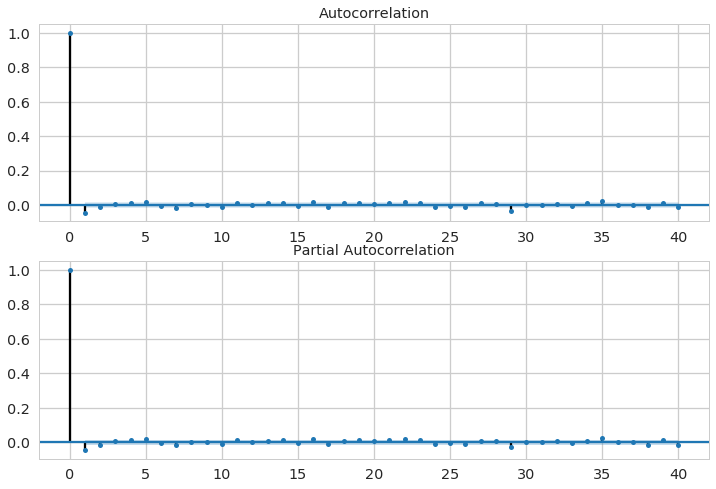

In [11]:
plot_acf_pacf (log_series_shift)

# ARIMA

In [12]:
new_df['log_series'] = log_series
new_df['log_series_shift'] = log_series_shift

# Train-Test Split

********************
Iteration 1 of 5
TRAIN: [   0    1    2 ... 2922 2923 2924] TEST: [2925 2926 2927 ... 5847 5848 5849]
Train shape:(2925,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:5358.675881541094
ARIMA(0, 0, 1)- AIC:1370.6441737160167
ARIMA(0, 1, 0)- AIC:-17795.539953353065
ARIMA(0, 1, 1)- AIC:-17793.56497363464
ARIMA(1, 0, 0)- AIC:-17788.09838874526
ARIMA(1, 0, 1)- AIC:-17786.10419500633
ARIMA(1, 1, 0)- AIC:-17793.562143972762
ARIMA(1, 1, 1)- AIC:-17796.00606327333
Best Model params:(1, 1, 1) AIC:-17796.00606327333
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 2924
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8902.003
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 05 Sep 2018   AIC                         -17796.006
Time:                        10:37:50   BIC                         -17772.083

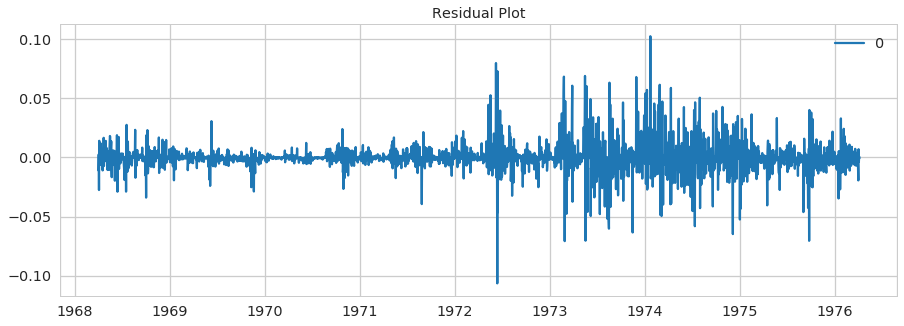

                  0
count  2.924000e+03
mean   1.887444e-07
std    1.152510e-02
min   -1.065016e-01
25%   -1.970499e-03
50%   -4.105318e-04
75%    1.345754e-03
max    1.024452e-01


********************
Iteration 2 of 5
TRAIN: [   0    1    2 ... 5847 5848 5849] TEST: [5850 5851 5852 ... 8772 8773 8774]
Train shape:(5850,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:15792.660349788817
ARIMA(0, 0, 1)- AIC:7814.097096459915
ARIMA(0, 1, 0)- AIC:-33512.28307448926
ARIMA(0, 1, 1)- AIC:-33516.96483489989
ARIMA(1, 0, 0)- AIC:-33502.69898062867
ARIMA(1, 0, 1)- AIC:-33507.0076839347
ARIMA(1, 1, 0)- AIC:-33516.56690977644
ARIMA(1, 1, 1)- AIC:-33517.28713825912
Best Model params:(1, 1, 1) AIC:-33517.28713825912
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 5849
Model:                 ARIMA(1, 1, 1)   Log Likelihood               16762.644
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 05 Sep 2018   AIC                         -33517.287
Time:                        10:37:55   BIC                         -33490.591
Sa

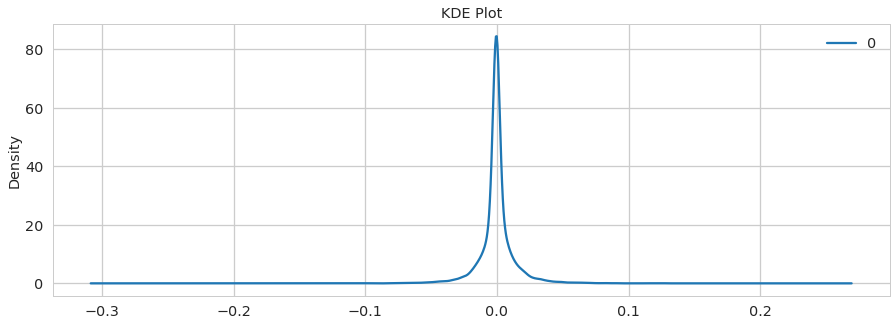

                  0
count  5.849000e+03
mean  -1.278381e-07
std    1.377704e-02
min   -1.640484e-01
25%   -2.716845e-03
50%   -4.122002e-04
75%    2.374833e-03
max    1.249847e-01


********************
Iteration 3 of 5
TRAIN: [   0    1    2 ... 8772 8773 8774] TEST: [ 8775  8776  8777 ... 11697 11698 11699]
Train shape:(8775,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:22924.70092833443
ARIMA(0, 0, 1)- AIC:10939.921256251488
ARIMA(0, 1, 0)- AIC:-52348.46895881136
ARIMA(0, 1, 1)- AIC:-52365.886422167765
ARIMA(1, 0, 0)- AIC:-52340.135707524285
ARIMA(1, 0, 1)- AIC:-52357.136942645724
ARIMA(1, 1, 0)- AIC:-52364.9954035126
ARIMA(1, 1, 1)- AIC:-52366.212486534554
Best Model params:(1, 1, 1) AIC:-52366.212486534554
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 8774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26187.106
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 05 Sep 2018   AIC                         -52366.212
Time:                        10:38:01   BIC                         -5

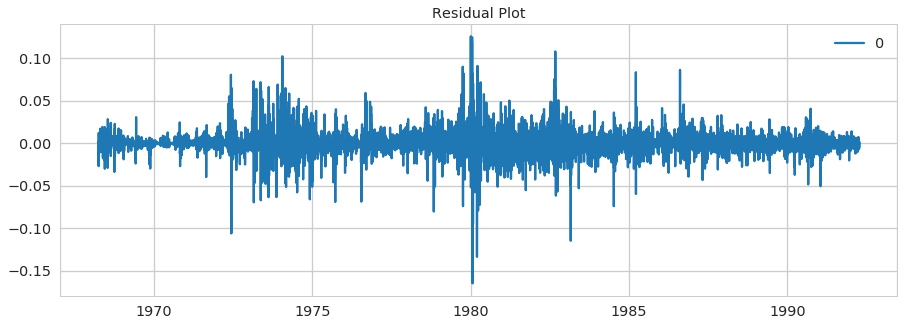

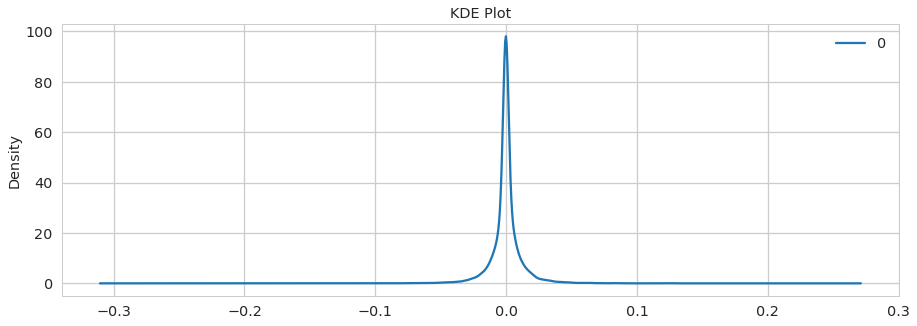

                  0
count  8.774000e+03
mean  -8.594146e-08
std    1.223435e-02
min   -1.650598e-01
25%   -2.567136e-03
50%   -2.630364e-04
75%    2.402579e-03
max    1.256747e-01


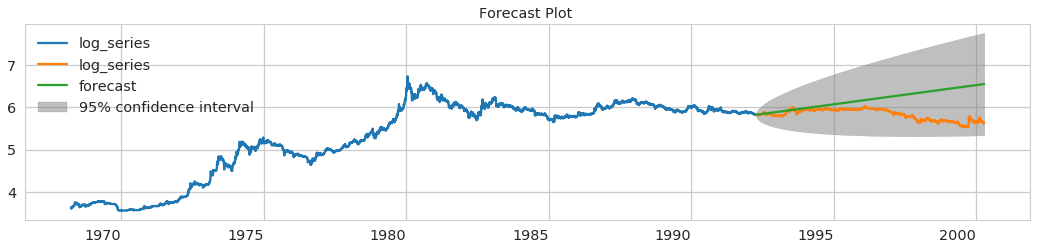

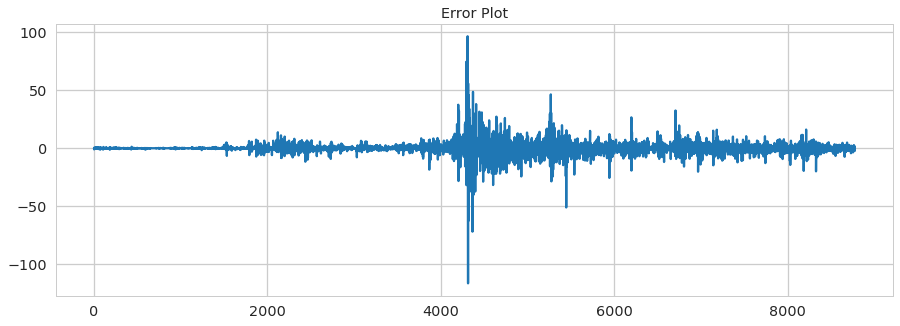

********************
Iteration 4 of 5
TRAIN: [    0     1     2 ... 11697 11698 11699] TEST: [11700 11701 11702 ... 14622 14623 14624]
Train shape:(11700,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:28323.59324349887
ARIMA(0, 0, 1)- AIC:12343.352798126485
ARIMA(0, 1, 0)- AIC:-72092.36827299204
ARIMA(0, 1, 1)- AIC:-72119.8213792116
ARIMA(1, 0, 0)- AIC:-72085.08760884573
ARIMA(1, 0, 1)- AIC:-72112.1889302815
ARIMA(1, 1, 0)- AIC:-72118.75588542139
ARIMA(1, 1, 1)- AIC:-72119.86496021623
Best Model params:(1, 1, 1) AIC:-72119.86496021623
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                11699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               36063.932
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 05 Sep 2018   AIC                         -72119.865
Time:                        10:38:09   BIC                         -

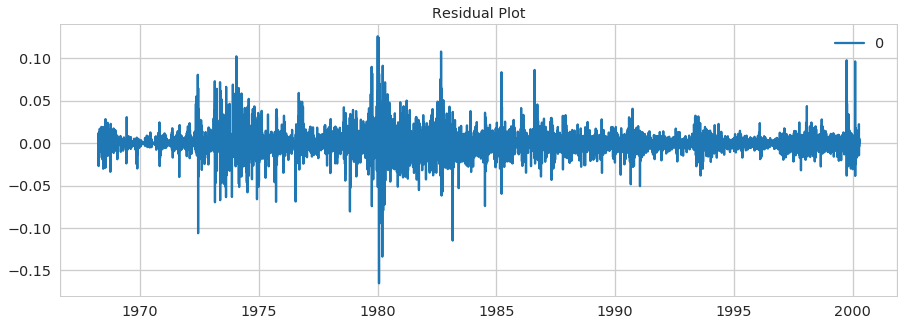

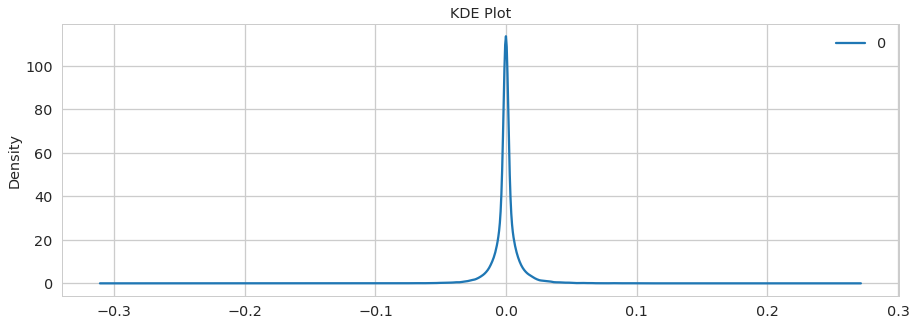

                  0
count  1.169900e+04
mean  -6.020113e-08
std    1.109183e-02
min   -1.652707e-01
25%   -2.322448e-03
50%   -1.811495e-04
75%    2.032719e-03
max    1.259057e-01


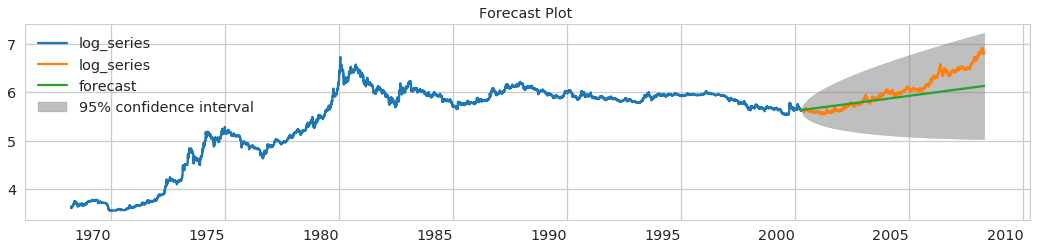

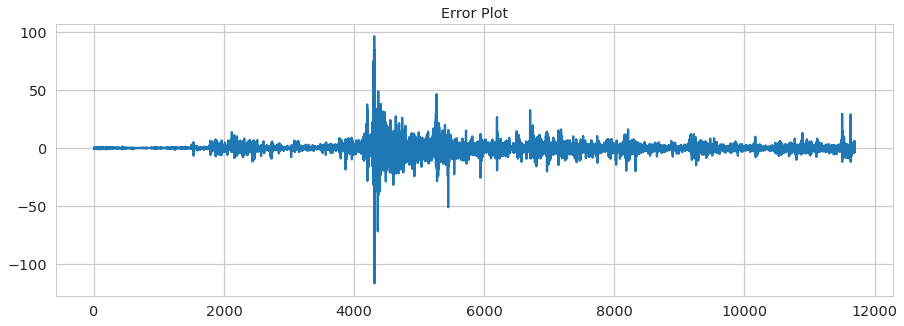

********************
Iteration 5 of 5
TRAIN: [    0     1     2 ... 14622 14623 14624] TEST: [14625 14626 14627 ... 17547 17548 17549]
Train shape:(14625,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:34336.88986620508
ARIMA(0, 0, 1)- AIC:14355.652400375831
ARIMA(0, 1, 0)- AIC:-91312.75496091212
ARIMA(0, 1, 1)- AIC:-91348.77150649179
ARIMA(1, 0, 0)- AIC:-91301.13184453626
ARIMA(1, 0, 1)- AIC:-91336.4111859453
ARIMA(1, 1, 0)- AIC:-91347.65810577202
ARIMA(1, 1, 1)- AIC:-91348.29945380724
Best Model params:(0, 1, 1) AIC:-91348.77150649179
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                14624
Model:                 ARIMA(0, 1, 1)   Log Likelihood               45677.386
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 05 Sep 2018   AIC                         -91348.772
Time:                        10:38:20   BIC                         

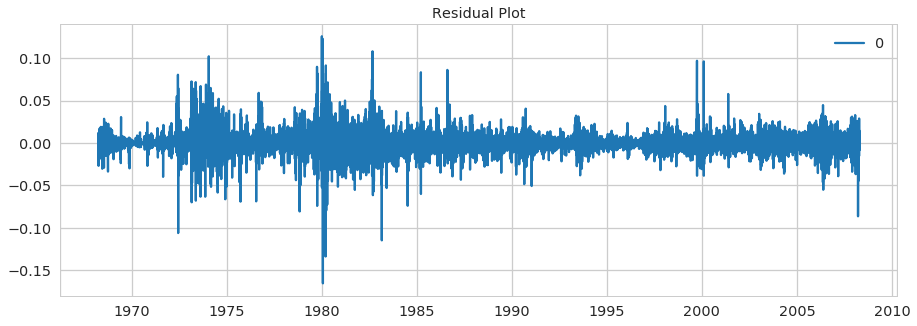

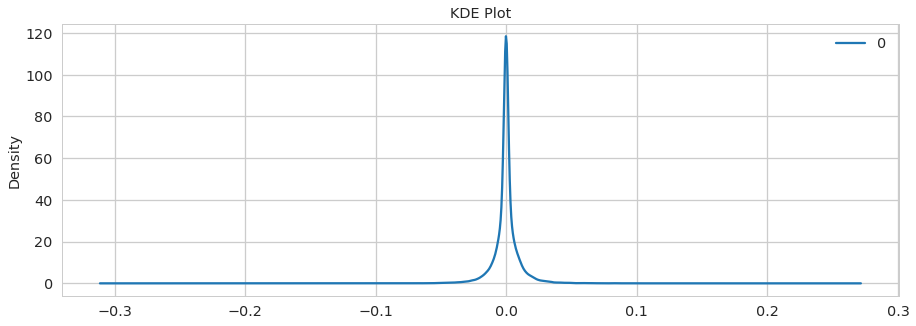

                  0
count  1.462400e+04
mean  -3.472626e-08
std    1.064827e-02
min   -1.656143e-01
25%   -2.387169e-03
50%   -2.301705e-04
75%    2.207817e-03
max    1.258538e-01


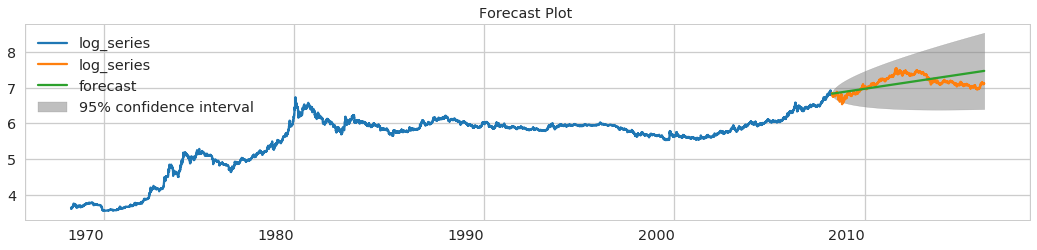

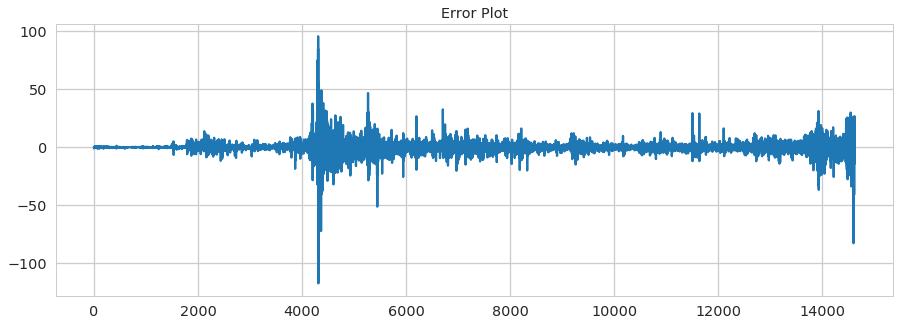

In [13]:
results_dict = arima_gridsearch_cv(new_df.log_series,cv_splits=5)